p_0001_1.RIGHT_MLO_b2.tif
Number of extrema in first octave: 2075
Number of extrema in second octave: 221
Number of extrema in third octave: 28
Number of extrema in fourth octave: 7
Calculating keypoint orientations...


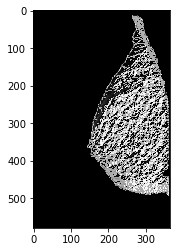

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
import os




path = r"C:\Users\cory\Documents\ddsm-samples"
ren = os.listdir(path)
length = len(ren)

keypoints = np.zeros((length, 9))

for m in range(0, length):
    addition = os.path.join(path,ren[m])
    image = cv2.imread(addition,0)
    Beginning_image = image
    print (ren[m])
   

    def Image_check_x(image):
        p = image.shape[0]
        if ((p+3)/4) != int((p+3)/4):
            if ((p+2)/4) != int((p+2)/4):
                if ((p+1)/4) != int((p+1)/4):
                    return p
                else:
                    return p+1
            else:
                return p+2
        else:
            return p+3



    def Image_check_y(image):
        p = image.shape[1]
        if ((p+3)/4) != int((p+3)/4):
            if ((p+2)/4) != int((p+2)/4):
                if ((p+1)/4) != int((p+1)/4):
                    return p
                else:
                    return p+1
            else:
                return p+2
        else:
            return p+3



    
    
    q = int(Image_check_x(Beginning_image))
    u = int(Image_check_y(Beginning_image))
    beginning_image = cv2.resize(Beginning_image,(u,q))
    s = 3
    k = 2 ** (1.0 / s) #kernals
    sig = 1.6
    kvector = np.array([sig, k*sig, sig*(k**2), sig*(k**3), sig*(k**4), sig*(k**5),sig*(k**6), sig*(k**7), sig*(k**8)])
    c = -1
    threshold = 1

    def gauss_blur(sigma):

        """Function to mimic the 'fspecial' gaussian MATLAB function
        """
        size = 2*np.ceil(3*sigma)+1
        x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
        g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
        return g/g.sum()


    #create image size variant
    
    pyrlvlx = np.zeros((q, u))
    pyrlvly = np.zeros((q, u))
    pyrlvlx[:,:] = ndimage.sobel(beginning_image, 0)
    pyrlvly[:,:] = ndimage.sobel(beginning_image, 1)
    Grmaglvl = (((pyrlvlx)**2)+((pyrlvly)**2))**0.5
    
    shape = cv2.resize((beginning_image), ((2*u,(2*q))))
    doubled = cv2.resize((Grmaglvl), ((2*u,(2*q))))
    normal = cv2.resize((doubled),(u,q))
    half = cv2.resize((normal), (int(u/2),int(q/2)))
    quarter = cv2.resize((half),(int(u/4),int(q/4)))
    
    
    #create zero layer for pyramid
    pyrlvl1 = np.zeros((doubled.shape[0], doubled.shape[1],6))
    pyrlvl2 = np.zeros((normal.shape[0], normal.shape[1],6))
    pyrlvl3 = np.zeros((half.shape[0], half.shape[1],6))
    pyrlvl4 = np.zeros((quarter.shape[0], quarter.shape[1],6))

    # create our Gaussian pyramid
    for i in range(0,6):
        pyrlvl1[:,:,i] = ndimage.filters.gaussian_filter(doubled, kvector[i]) 
        pyrlvl2[:,:,i] = ndimage.filters.gaussian_filter(normal, kvector[i+1])
        pyrlvl3[:,:,i] = ndimage.filters.gaussian_filter(half, kvector[i+2])
        pyrlvl4[:,:,i] = ndimage.filters.gaussian_filter(quarter,kvector[i+3])

    #create zero layer for DoG images 
    DoGlvl1 = np.zeros((doubled.shape[0], doubled.shape[1],5))
    DoGlvl2 = np.zeros((normal.shape[0], normal.shape[1],5))
    DoGlvl3 = np.zeros((half.shape[0], half.shape[1],5))
    DoGlvl4 = np.zeros((quarter.shape[0], quarter.shape[1],5))

    # create DoG layer
    for i in range (0,5):
        DoGlvl1[:,:,i] = pyrlvl1[:,:,i+1] - pyrlvl1[:,:,i]
        DoGlvl2[:,:,i] = pyrlvl2[:,:,i+1] - pyrlvl2[:,:,i]
        DoGlvl3[:,:,i] = pyrlvl3[:,:,i+1] - pyrlvl3[:,:,i]
        DoGlvl4[:,:,i] = pyrlvl4[:,:,i+1] - pyrlvl4[:,:,i]
    
    # create zero layer to store extrema location
    Exlvl1 = np.zeros((doubled.shape[0], doubled.shape[1],3))
    Exlvl2 = np.zeros((normal.shape[0], normal.shape[1],3))
    Exlvl3 = np.zeros((half.shape[0], half.shape[1],3))
    Exlvl4 = np.zeros((quarter.shape[0], quarter.shape[1],3))

    area1 = np.zeros((doubled.shape[0], doubled.shape[1]))
    area2 = np.zeros((normal.shape[0], normal.shape[1]))
    area3 = np.zeros((half.shape[0], half.shape[1]))
    area4 = np.zeros((quarter.shape[0], quarter.shape[1]))

    for j in range(1, doubled.shape[0] -1):
        for k in range(1, doubled.shape[1]-1):
            if pyrlvl1[j,k,1]> 0:
                area1[j,k] = 1

    for j in range(1, normal.shape[0] -1):
        for k in range(1, normal.shape[1]-1):
            if pyrlvl2[j,k,1]> 0:
                area2[j,k] = 1
            
    for j in range(1, half.shape[0] -1):
        for k in range(1, half.shape[1]-1):
            if pyrlvl3[j,k,1]> 0:
                area3[j,k] = 1
            
    for j in range(1, quarter.shape[0] -1):
        for k in range(1, quarter.shape[1]-1):
            if pyrlvl4[j,k,1]> 0:
                area4[j,k] = 1
            
    for i in range(1,4):
        for j in range(16, doubled.shape[0] -16):
            for k in range(16, doubled.shape[1]-16):
                if np.absolute(DoGlvl1[j, k, i]) < threshold:
                    continue
                maxima = DoGlvl1[j,k,i] > 0
                minima = DoGlvl1[j,k,i] < 0
                for di in range(-1,2):
                    for dj in range(-1,2):
                        for dk in range(-1,2):
                            if di == 0 and dj ==0 and dk == 0:
                                continue
                            maxima = maxima and (DoGlvl1[j, k, i] > DoGlvl1[j + dj, k + dk, i + di])
                            minima = minima and (DoGlvl1[j, k, i] < DoGlvl1[j + dj, k + dk, i + di])
                        
                            if not maxima and not minima:
                                break

                        if not maxima and not minima:
                            break

                    if not maxima and not minima:
                        break
                if maxima or minima:
                    dx = (DoGlvl1[j, k+1, i] - DoGlvl1[j, k-1, i]) * 0.5 / 255
                    dy = (DoGlvl1[j+1, k, i] - DoGlvl1[j-1, k, i]) * 0.5 / 255
                    dz = (DoGlvl1[j, k, i+1] - DoGlvl1[j, k, i-1]) * 0.5 / 255
                    dxx = (DoGlvl1[j, k+1, i] + DoGlvl1[j, k-1, i] - 2 * DoGlvl1[j, k, i]) * 1.0 / 255        
                    dyy = (DoGlvl1[j+1, k, i] + DoGlvl1[j-1, k, i] - 2 * DoGlvl1[j, k, i]) * 1.0 / 255          
                    dzz = (DoGlvl1[j, k, i+1] + DoGlvl1[j, k, i-1] - 2 * DoGlvl1[j, k, i]) * 1.0 / 255
                    dxy = (DoGlvl1[j+1, k+1, i] - DoGlvl1[j+1, k-1, i] - DoGlvl1[j-1, k+1, i] + DoGlvl1[j-1, k-1, i]) * 0.25 / 255 
                    dxz = (DoGlvl1[j, k+1, i+1] - DoGlvl1[j, k-1, i+1] - DoGlvl1[j, k+1, i-1] + DoGlvl1[j, k-1, i-1]) * 0.25 / 255 
                    dyz = (DoGlvl1[j+1, k, i+1] - DoGlvl1[j-1, k, i+1] - DoGlvl1[j+1, k, i-1] + DoGlvl1[j-1, k, i-1]) * 0.25 / 255  
                
                
                    J = np.matrix([[dx], [dy], [dz]])
                    DH = np.matrix([[dxx, dxy, dxz], [dxy, dyy, dyz], [dxz, dyz, dzz]])
                    detA = (dxx*((dyy * dzz)-(dyz**2))) + (dxy*((dxy*dzz)-(dxz*dyz))) + (dxz*((dxy*dxz)-((dyy*dxz))))
                    invDH = np.linalg.pinv(DH)
                
                    X_hat = np.dot(invDH,J)
                    D_X_hat = DoGlvl1[j,k,i] + (0.5 * np.dot(J,np.transpose(X_hat))) #contast variable
                    r = 10.0
                    if [(((dxx + dyy) ** 2) * r) < (dxx * dyy - (dxy ** 2)) * (((r + 1) ** 2)) and np.absolute(D_X_hat) < 0.03]:
                        Exlvl1[j, k, i - 1] = 1

    for i in range(1,4):
        for j in range(8, normal.shape[0] -8):
            for k in range(8, normal.shape[1]-8):
                if np.absolute(DoGlvl2[j, k, i]) < threshold:
                    continue
                maxima = DoGlvl2[j,k,i] > 0
                minima = DoGlvl2[j,k,i] < 0
                for di in range(-1,2):
                    for dj in range(-1,2):
                        for dk in range(-1,2):
                            if di == 0 and dj ==0 and dk == 0:
                                continue
                            maxima = maxima and (DoGlvl2[j, k, i] > DoGlvl2[j + dj, k + dk, i + di])
                            minima = minima and (DoGlvl2[j, k, i] < DoGlvl2[j + dj, k + dk, i + di])
                        
                            if not maxima and not minima:
                                break

                        if not maxima and not minima:
                            break

                    if not maxima and not minima:
                        break
                if maxima or minima:
                    dx = (DoGlvl2[j, k+1, i] - DoGlvl2[j, k-1, i]) * 0.5 / 255
                    dy = (DoGlvl2[j+1, k, i] - DoGlvl2[j-1, k, i]) * 0.5 / 255
                    dz = (DoGlvl2[j, k, i+1] - DoGlvl2[j, k, i-1]) * 0.5 / 255
                    dxx = (DoGlvl2[j, k+1, i] + DoGlvl2[j, k-1, i] - 2 * DoGlvl2[j, k, i]) * 1.0 / 255        
                    dyy = (DoGlvl2[j+1, k, i] + DoGlvl2[j-1, k, i] - 2 * DoGlvl2[j, k, i]) * 1.0 / 255          
                    dzz = (DoGlvl2[j, k, i+1] + DoGlvl2[j, k, i-1] - 2 * DoGlvl2[j, k, i]) * 1.0 / 255
                    dxy = (DoGlvl2[j+1, k+1, i] - DoGlvl2[j+1, k-1, i] - DoGlvl2[j-1, k+1, i] + DoGlvl2[j-1, k-1, i]) * 0.25 / 255 
                    dxz = (DoGlvl2[j, k+1, i+1] - DoGlvl2[j, k-1, i+1] - DoGlvl2[j, k+1, i-1] + DoGlvl2[j, k-1, i-1]) * 0.25 / 255 
                    dyz = (DoGlvl2[j+1, k, i+1] - DoGlvl2[j-1, k, i+1] - DoGlvl2[j+1, k, i-1] + DoGlvl2[j-1, k, i-1]) * 0.25 / 255  
                
                
                    J = np.matrix([[dx], [dy], [dz]])
                    DH = np.matrix([[dxx, dxy, dxz], [dxy, dyy, dyz], [dxz, dyz, dzz]])
                    detA = (dxx*((dyy * dzz)-(dyz**2))) + (dxy*((dxy*dzz)-(dxz*dyz))) + (dxz*((dxy*dxz)-((dyy*dxz))))
                    invDH = np.linalg.pinv(DH)
                    X_hat = np.dot(invDH,J)
                    D_X_hat = DoGlvl2[j,k,i] + (0.5 * np.dot(J,np.transpose(X_hat))) #contast variable
                    r = 10.0
                    if [(((dxx + dyy) ** 2) * r) < (dxx * dyy - (dxy ** 2)) * (((r + 1) ** 2)) and np.absolute(D_X_hat) < 0.03]:
                        Exlvl2[j, k, i - 1] = 1
                    
    for i in range(1,4):
        for j in range(4, half.shape[0] -4):
            for k in range(4, half.shape[1]-4):
                if np.absolute(DoGlvl3[j, k, i]) < threshold:
                    continue
                maxima = DoGlvl3[j,k,i] > 0
                minima = DoGlvl3[j,k,i] < 0
                for di in range(-1,2):
                    for dj in range(-1,2):
                        for dk in range(-1,2):
                            if di == 0 and dj ==0 and dk == 0:
                                continue
                            maxima = maxima and (DoGlvl3[j, k, i] > DoGlvl3[j + dj, k + dk, i + di])
                            minima = minima and (DoGlvl3[j, k, i] < DoGlvl3[j + dj, k + dk, i + di])
                        
                            if not maxima and not minima:
                                break

                        if not maxima and not minima:
                            break

                    if not maxima and not minima:
                        break
                if maxima or minima:
                    dx = (DoGlvl3[j, k+1, i] - DoGlvl3[j, k-1, i]) * 0.5 / 255
                    dy = (DoGlvl3[j+1, k, i] - DoGlvl3[j-1, k, i]) * 0.5 / 255
                    dz = (DoGlvl3[j, k, i+1] - DoGlvl3[j, k, i-1]) * 0.5 / 255
                    dxx = (DoGlvl3[j, k+1, i] + DoGlvl3[j, k-1, i] - 2 * DoGlvl3[j, k, i]) * 1.0 / 255        
                    dyy = (DoGlvl3[j+1, k, i] + DoGlvl3[j-1, k, i] - 2 * DoGlvl3[j, k, i]) * 1.0 / 255          
                    dzz = (DoGlvl3[j, k, i+1] + DoGlvl3[j, k, i-1] - 2 * DoGlvl3[j, k, i]) * 1.0 / 255
                    dxy = (DoGlvl3[j+1, k+1, i] - DoGlvl3[j+1, k-1, i] - DoGlvl3[j-1, k+1, i] + DoGlvl3[j-1, k-1, i]) * 0.25 / 255 
                    dxz = (DoGlvl3[j, k+1, i+1] - DoGlvl3[j, k-1, i+1] - DoGlvl3[j, k+1, i-1] + DoGlvl3[j, k-1, i-1]) * 0.25 / 255 
                    dyz = (DoGlvl3[j+1, k, i+1] - DoGlvl3[j-1, k, i+1] - DoGlvl3[j+1, k, i-1] + DoGlvl3[j-1, k, i-1]) * 0.25 / 255  
                
                
                    J = np.matrix([[dx], [dy], [dz]])
                    DH = np.matrix([[dxx, dxy, dxz], [dxy, dyy, dyz], [dxz, dyz, dzz]])
                    detA = (dxx*((dyy * dzz)-(dyz**2))) + (dxy*((dxy*dzz)-(dxz*dyz))) + (dxz*((dxy*dxz)-((dyy*dxz))))
                    invDH = np.linalg.pinv(DH)
                
                    X_hat = np.dot(invDH,J)
                    D_X_hat = DoGlvl3[j,k,i] + (0.5 * np.dot(J,np.transpose(X_hat))) #contast variable
                    r = 10.0
                    if [(((dxx + dyy) ** 2) * r) < (dxx * dyy - (dxy ** 2)) * (((r + 1) ** 2)) and np.absolute(D_X_hat) < 0.03]:
                        Exlvl3[j, k, i - 1] = 1
        
    for i in range(1,4):
        for j in range(2, quarter.shape[0] -2):
            for k in range(2, quarter.shape[1]-2):
                if np.absolute(DoGlvl4[j, k, i]) < threshold:
                    continue
                maxima = DoGlvl4[j,k,i] > 0
                minima = DoGlvl4[j,k,i] < 0
                for di in range(-1,2):
                    for dj in range(-1,2):
                        for dk in range(-1,2):
                            if di == 0 and dj ==0 and dk == 0:
                                continue
                            maxima = maxima and (DoGlvl4[j, k, i] > DoGlvl4[j + dj, k + dk, i + di])
                            minima = minima and (DoGlvl4[j, k, i] < DoGlvl4[j + dj, k + dk, i + di])
                        
                            if not maxima and not minima:
                                break

                        if not maxima and not minima:
                            break

                    if not maxima and not minima:
                        break
                if maxima or minima:
                    dx = (DoGlvl4[j, k+1, i] - DoGlvl4[j, k-1, i]) * 0.5 / 255
                    dy = (DoGlvl4[j+1, k, i] - DoGlvl4[j-1, k, i]) * 0.5 / 255
                    dz = (DoGlvl4[j, k, i+1] - DoGlvl4[j, k, i-1]) * 0.5 / 255
                    dxx = (DoGlvl4[j, k+1, i] + DoGlvl4[j, k-1, i] - 2 * DoGlvl4[j, k, i]) * 1.0 / 255        
                    dyy = (DoGlvl4[j+1, k, i] + DoGlvl4[j-1, k, i] - 2 * DoGlvl4[j, k, i]) * 1.0 / 255          
                    dzz = (DoGlvl4[j, k, i+1] + DoGlvl4[j, k, i-1] - 2 * DoGlvl4[j, k, i]) * 1.0 / 255
                    dxy = (DoGlvl4[j+1, k+1, i] - DoGlvl4[j+1, k-1, i] - DoGlvl4[j-1, k+1, i] + DoGlvl4[j-1, k-1, i]) * 0.25 / 255 
                    dxz = (DoGlvl4[j, k+1, i+1] - DoGlvl4[j, k-1, i+1] - DoGlvl4[j, k+1, i-1] + DoGlvl4[j, k-1, i-1]) * 0.25 / 255 
                    dyz = (DoGlvl4[j+1, k, i+1] - DoGlvl4[j-1, k, i+1] - DoGlvl4[j+1, k, i-1] + DoGlvl4[j-1, k, i-1]) * 0.25 / 255  
                
                
                    J = np.matrix([[dx], [dy], [dz]])
                    DH = np.matrix([[dxx, dxy, dxz], [dxy, dyy, dyz], [dxz, dyz, dzz]])
                    detA = (dxx*((dyy * dzz)-(dyz**2))) + (dxy*((dxy*dzz)-(dxz*dyz))) + (dxz*((dxy*dxz)-((dyy*dxz))))
                    invDH = np.linalg.pinv(DH)
                
                    X_hat = np.dot(invDH,J)
                    D_X_hat = DoGlvl4[j,k,i] + (0.5 * np.dot(J,np.transpose(X_hat))) #contast variable
                    r = 10.0
                    if [(((dxx + dyy) ** 2) * r) < (dxx * dyy - (dxy ** 2)) * (((r + 1) ** 2)) and np.absolute(D_X_hat) < 0.03]:
                        Exlvl4[j, k, i - 1] = 1
                    
    print("Number of extrema in first octave: %d" % np.sum(Exlvl1))
    print("Number of extrema in second octave: %d" % np.sum(Exlvl2))
    print("Number of extrema in third octave: %d" % np.sum(Exlvl3))
    print("Number of extrema in fourth octave: %d" % np.sum(Exlvl4))
    count = 0
    extr_sum = int(np.sum(Exlvl1)) + int(np.sum(Exlvl2)) + int(np.sum(Exlvl3)) + int(np.sum(Exlvl4))
    kepnts = np.zeros((int(np.sum(Exlvl1)), 2)) 
    for i in range(0, 3):
        for j in range(0, doubled.shape[0] - 1):
            for k in range(0, doubled.shape[1] - 1):
                if Exlvl1[j, k, i] == 1:
                    kepnts[count, :] =  np.array([[int(k) , int(j)]])
                    count+= 1
    

    keypoints[m, :] = np.array([[np.sum(Exlvl1) , np.sum(Exlvl2) , np.sum(Exlvl3),np.sum(Exlvl4),extr_sum, np.sum(area1), np.sum(area2), np.sum(area3),np.sum(area4)]])
    print("Calculating keypoint orientations...")
    plt.imshow(Grmaglvl, cmap = 'gray')
    plt.show()
    radius = 3
    thickness = 1
    color = (0, 0, 0)
    for i in range(0, int(np.sum(Exlvl1))):
        center_coordinates = (int(kepnts[i,0]),int(kepnts[i,1]))
        cv2.circle(shape, center_coordinates, radius, color, thickness)
    cv2.imwrite(r"C:\Users\cory\Documents\DOG-keypoints.jpg",shape)
    
    break

np.savetxt(r"C:\Users\cory\Documents\ddsm-gradient-feature-keypoints.csv", keypoints, delimiter=',', fmt='%d')
np.savetxt(r"C:\Users\cory\Documents\ddsm gradient-feature-order.txt",ren,delimiter=',', fmt='%s' )    
